In [223]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import yfinance as yf
import pandas_datareader.data as pdr
import datetime

In [224]:
#set yfinance to fetch required data
yf.pdr_override

start='2010-01-01'
end=datetime.datetime.now().strftime("%Y-%m-%d")
company='FB'
train_cutoff="2018-12-31"

In [225]:
#function to get data
df = pdr.get_data_yahoo("FB", start, end).reset_index()

#   df.to_csv('FB.csv', index=False)

df['HL_PCT_FB']=(df['High']-df['Low'])/df['Close']*100.0
df['PCT_change_FB']=(df['Close']-df['Open'])/df['Open']*100.0

df.head


<bound method NDFrame.head of            Date    High     Low    Open   Close     Volume  Adj Close  \
0    2012-05-18   45.00   38.00   42.05   38.23  573576400      38.23   
1    2012-05-21   36.66   33.00   36.53   34.03  168192700      34.03   
2    2012-05-22   33.59   30.94   32.61   31.00  101786600      31.00   
3    2012-05-23   32.50   31.36   31.37   32.00   73600000      32.00   
4    2012-05-24   33.21   31.77   32.95   33.03   50237200      33.03   
5    2012-05-25   32.95   31.11   32.90   31.91   37149800      31.91   
6    2012-05-29   31.69   28.65   31.48   28.84   78063400      28.84   
7    2012-05-30   29.55   27.86   28.70   28.19   57267900      28.19   
8    2012-05-31   29.67   26.83   28.55   29.60  111639200      29.60   
9    2012-06-01   29.15   27.39   28.89   27.72   41855500      27.72   
10   2012-06-04   27.65   26.44   27.20   26.90   35230300      26.90   
11   2012-06-05   27.76   25.75   26.70   25.87   42473400      25.87   
12   2012-06-06   27.

In [226]:
# Summarize Data

# Descriptive statistics
# shape
print(df.shape)
# types
print(df.dtypes)
# head
print(df.head(20))
# descriptions, change precision to 2 places
set_option('precision', 1)
print(df.describe())
# correlation
set_option('precision', 2)
print(df.corr(method='pearson'))


(1836, 9)
Date             datetime64[ns]
High                    float64
Low                     float64
Open                    float64
Close                   float64
Volume                    int64
Adj Close               float64
HL_PCT_FB               float64
PCT_change_FB           float64
dtype: object
         Date   High    Low   Open  Close     Volume  Adj Close  HL_PCT_FB  \
0  2012-05-18  45.00  38.00  42.05  38.23  573576400      38.23      18.31   
1  2012-05-21  36.66  33.00  36.53  34.03  168192700      34.03      10.76   
2  2012-05-22  33.59  30.94  32.61  31.00  101786600      31.00       8.55   
3  2012-05-23  32.50  31.36  31.37  32.00   73600000      32.00       3.56   
4  2012-05-24  33.21  31.77  32.95  33.03   50237200      33.03       4.36   
5  2012-05-25  32.95  31.11  32.90  31.91   37149800      31.91       5.77   
6  2012-05-29  31.69  28.65  31.48  28.84   78063400      28.84      10.54   
7  2012-05-30  29.55  27.86  28.70  28.19   57267900      28.19 

In [227]:
#preprocess data
scaler=StandardScaler()

X_train=df[df['Date']<=train_cutoff].drop(['Close','Adj Close','Date'],axis=1)
X_test=df[df['Date']>train_cutoff].drop(['Close','Adj Close','Date'],axis=1)

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Y_train=df[df['Date']<=train_cutoff]['Close']
Y_test=df[df['Date']>train_cutoff]['Close']


# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 20
seed = 7
scoring = 'neg_mean_squared_error'

In [228]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [229]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: -0.412985 (0.490226)
LASSO: -2.142513 (1.674840)
EN: -82.169061 (83.265551)
KNN: -35.395878 (29.490449)


/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531.4304611306598, tolerance: 415.9198111612701
  positive)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542.6232943372202, tolerance: 413.9313055356708
  positive)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552.7757831478184, tolerance: 418.18643347948597
  positive)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

CART: -5.704094 (14.818780)


/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ganagni/anaconda3/lib/python3.7/site-packa

SVR: -163.514851 (264.543669)


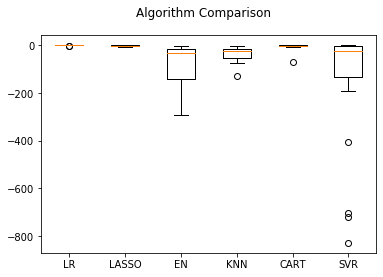

In [230]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [231]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledLR: -0.412985 (0.490226)
ScaledLASSO: -2.073330 (1.570941)
ScaledEN: -75.788830 (72.165108)
ScaledKNN: -35.277775 (28.878006)


/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537.6294799265211, tolerance: 415.9198111612701
  positive)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540.8988921293903, tolerance: 413.9313055356708
  positive)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546.6201893921425, tolerance: 418.18643347948597
  positive)
/Users/ganagni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

ScaledCART: -5.343738 (13.729832)
ScaledSVR: -170.540481 (279.196226)


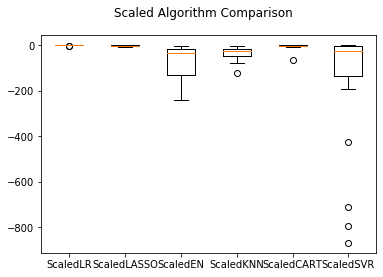

In [232]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

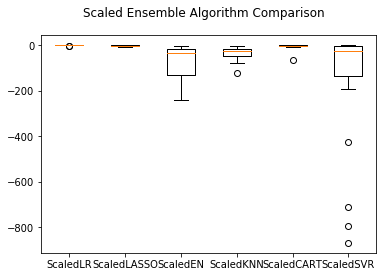

In [233]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()